In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='anl', project='csc430')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>,
 <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430'

In [3]:
import math
import numpy as np
import random
import re
import qiskit.tools.jupyter
from math import pi

from qiskit import *
from qiskit.circuit import Gate
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq.managed import IBMQJobManager

from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import StochasticSwap, BasicSwap

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter

from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
%matplotlib inline

from qiskit.providers.aer import AerSimulator

In [4]:
device = provider.get_backend('ibmq_jakarta')
job_manager = IBMQJobManager()
backend_monitor(device)
device

ibmq_jakarta
Configuration
-------------
    n_qubits: 7
    operational: True
    status_msg: active
    pending_jobs: 293
    backend_version: 1.0.32
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    description: 7 qubit device
    max_experiments: 300
    credits_required: True
    max_shots: 32000
    dynamic_reprate_enabled: True
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 6, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}]]
    pulse_num_channels: 9
    conditional: False
    sample_name: family: Falcon, revision: 5.11, segment: H
    supported_instructions: ['setf', 'delay', 'sx', 'x', 'cx', 'u2', 'rz', 'u1', 'acquire', 'u3', 'measure', 'reset', 'id', 'shiftf', 'play

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 5.23654 GHz / 192.79562 us / 47.98053 us / 0.00000 / 0.00030 / 0.00030 / 0.03960 
    Q1 / 5.01435 GHz / 111.78168 us / 33.56751 us / 0.00000 / 0.00021 / 0.00021 / 0.02950 
    Q2 / 5.10857 GHz / 123.89237 us / 25.69233 us / 0.00000 / 0.00027 / 0.00027 / 0.02180 
    Q3 / 5.17814 GHz / 7.45237 us / 38.34813 us / 0.00000 / 0.00032 / 0.00032 / 0.03190 
    Q4 / 5.21304 GHz / 124.57587 us / 100.08295 us / 0.00000 / 0.00022 / 0.00022 / 0.02510 
    Q5 / 5.06342 GHz / 166.57567 us / 65.77741 us / 0.00000 / 0.00018 / 0.00018 / 0.03160 
    Q6 / 5.30046 GHz / 114.67402 us / 25.42410 us / 0.00000 / 0.00027 / 0.00027 / 0.02150 

Multi-Qubit Gates [Name / Type / Gate Error]
--------------------------------------------
    cx5_4 / cx / 0.01058
    cx4_5 / cx / 0.01058
    cx1_3 / cx / 0.00882
    cx3_1 / cx / 0.00882
    cx6_5 / cx / 0.00602
    cx

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>

Original Circ

In [8]:
circ_orign = QuantumCircuit(5)

circ_orign.rzx(pi/2, 0,1)
circ_orign.rzx(pi/2, 1,0)
circ_orign.append(qiskit_superstaq.AceCR("+-"), [2, 3])

In [9]:
circ_orign_transpile = transpile(circ_orign, backend=device, optimization_level = 3)

In [10]:
circ_orign_transpile.draw()

global phase: π/4
                                                                            »
ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
                  ┌───┐   ┌───┐   ┌─────────┐                          ┌───┐»
      q_1 -> 1 ───┤ X ├───┤ X ├───┤ Rz(π/2) ├──────────────────────────┤ X ├»
               ┌──┴───┴──┐└─┬─┘   └──┬────┬─┘  ┌──────────┐   ┌────┐   └─┬─┘»
      q_0 -> 2 ┤ Rz(π/2) ├──■────────┤ √X ├────┤ Rz(-π/2) ├───┤ √X ├─────■──»
               └─────────┘           └────┘    └──────────┘   └────┘        »
      q_2 -> 3 ──────────────────────────────────────────────────────────■──»
                                                                         │  »
ancilla_1 -> 4 ──────────────────────────────────────────────────────────┼──»
               ┌─────────┐┌────┐┌─────────────┐   ┌────┐   ┌──────────┐┌─┴─┐»
      q_3 -> 5 ┤ Rz(π/2) ├┤ √X ├┤ Rz(-1.6368) ├───┤ √X ├───┤ Rz(-π/2) ├┤ X ├»
               └─────────┘└────┘└─────────────┘   └────┘   └──────────┘└───┘»
      q_4 -> 6 ─────────────────────────────────────────────────────────────»
                                                                            »
«                                                                      
«ancilla_0 -> 0 ───────────────────────────────────────────────────────
«               ┌─────────┐    ┌────┐    ┌─────────┐                   
«      q_1 -> 1 ┤ Rz(π/2) ├────┤ √X ├────┤ Rz(π/2) ├───────────────────
«               └┬────────┤    ├────┤    ├─────────┴┐                  
«      q_0 -> 2 ─┤ Rz(-π) ├────┤ √X ├────┤ Rz(-π/2) ├──────────────────
«                └─┬───┬──┘ ┌──┴────┴─┐  └──────────┘                  
«      q_2 -> 3 ───┤ X ├────┤ Rz(π/2) ├────────────────────────────────
«                  └───┘    └─────────┘                                
«ancilla_1 -> 4 ───────────────────────────────────────────────────────
«               ┌──────────┐   ┌────┐  ┌─────────────┐┌────┐┌─────────┐
«      q_3 -> 5 ┤ Rz(-π/2) ├───┤ √X ├──┤ Rz(-3.0756) ├┤ √X ├┤ Rz(π/2) ├
«               └──────────┘   └────┘  └─────────────┘└────┘└─────────┘
«      q_4 -> 6 ───────────────────────────────────────────────────────
«

In [11]:
circ_orign_schedule = schedule(
            circuits=circ_orign_transpile,
            backend=device,
            inst_map=None,
            meas_map=None,
            method=None,
        )

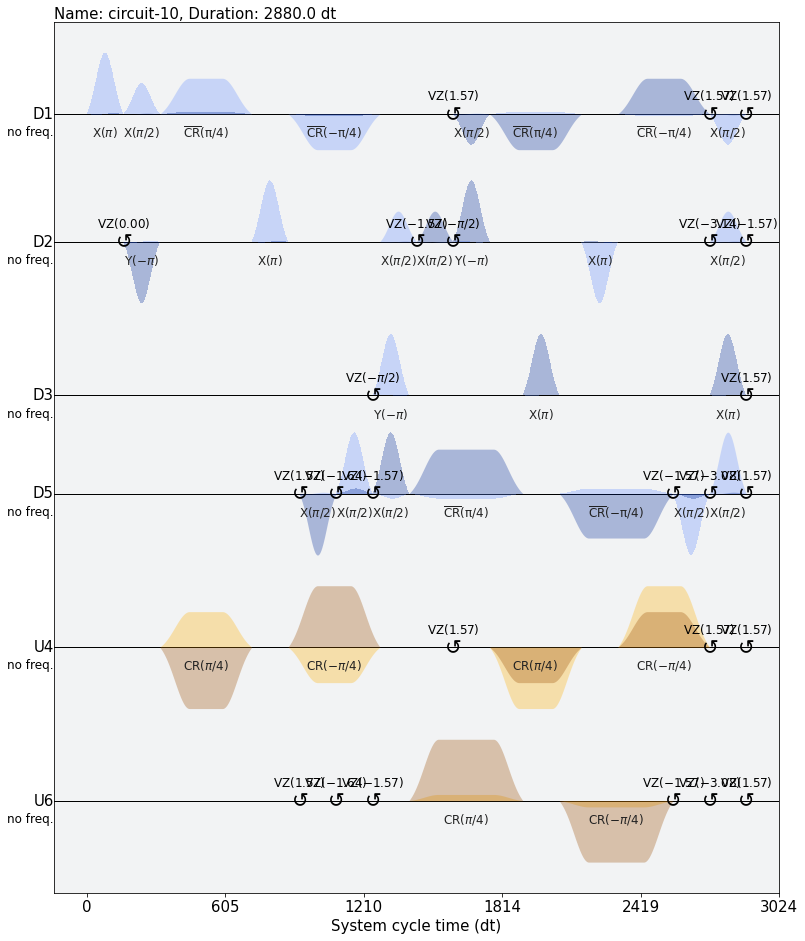

In [12]:
circ_orign_schedule.draw()

In [13]:
from typing import AbstractSet, Any, Callable, Dict, List, Optional, Sequence, Tuple, Union

In [14]:
# Superstaq-related imports
import cirq
import cirq_superstaq
from cirq_superstaq import Service, AceCRPlusMinus, AceCRMinusPlus
import cirq_superstaq
from cirq.contrib.svg import SVGCircuit
import qiskit
import qiskit_superstaq

In [15]:
provider = qiskit_superstaq.superstaq_provider.SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [16]:
compiler_output = provider.ibmq_compile(circ_orign, target="ibmq_jakarta_qpu")

In [17]:
compiler_output.circuit.draw()

┌────────────┐                                             ┌───────────┐»
q_0: ┤ Rz(5.6221) ├─────────────────────────────────────────────┤0          ├»
     └┬─────────┬─┘┌─────────┐┌──────────┐┌─────────┐┌─────────┐│  Acecr_pm │»
q_1: ─┤ Rz(π/2) ├──┤ Rx(π/2) ├┤ Rz(7π/4) ├┤ Rx(π/2) ├┤ Rz(π/2) ├┤1          ├»
      └─────────┘  └─────────┘└──────────┘└─────────┘└─────────┘└───────────┘»
q_2: ────────────────────────────────────────────────────────────────────────»
     ┌───────────┐                                                           »
q_3: ┤0          ├───────────────────────────────────────────────────────────»
     │           │                                                           »
q_4: ┤  Acecr_pm ├───────────────────────────────────────────────────────────»
     │           │                                                           »
q_5: ┤1          ├───────────────────────────────────────────────────────────»
     └───────────┘                                                           »
«      ┌────────────┐┌─────────┐ ┌─────────┐                          »
«q_0: ─┤ Rz(4.0513) ├┤ Rx(π/2) ├─┤ Rz(π/4) ├──────────────────────────»
«     ┌┴────────────┤├─────────┤┌┴─────────┴─┐┌─────────┐┌───────────┐»
«q_1: ┤ Rz(0.50282) ├┤ Rx(π/2) ├┤ Rz(5.1615) ├┤ Rx(π/2) ├┤ Rz(5.615) ├»
«     └─────────────┘└─────────┘└────────────┘└─────────┘└───────────┘»
«q_2: ────────────────────────────────────────────────────────────────»
«                                                                     »
«q_3: ────────────────────────────────────────────────────────────────»
«                                                                     »
«q_4: ────────────────────────────────────────────────────────────────»
«                                                                     »
«q_5: ────────────────────────────────────────────────────────────────»
«                                                                     »
«     ┌───────────┐┌─────────┐┌─────────┐ ┌─────────┐  
«q_0: ┤0          ├┤ Rz(π/4) ├┤ Rx(π/2) ├─┤ Rz(π/2) ├──
«     │  Acecr_pm │├─────────┤├─────────┤┌┴─────────┴─┐
«q_1: ┤1          ├┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(2.2318) ├
«     └───────────┘└─────────┘└─────────┘└────────────┘
«q_2: ─────────────────────────────────────────────────
«                                                      
«q_3: ─────────────────────────────────────────────────
«                                                      
«q_4: ─────────────────────────────────────────────────
«                                                      
«q_5: ─────────────────────────────────────────────────
«

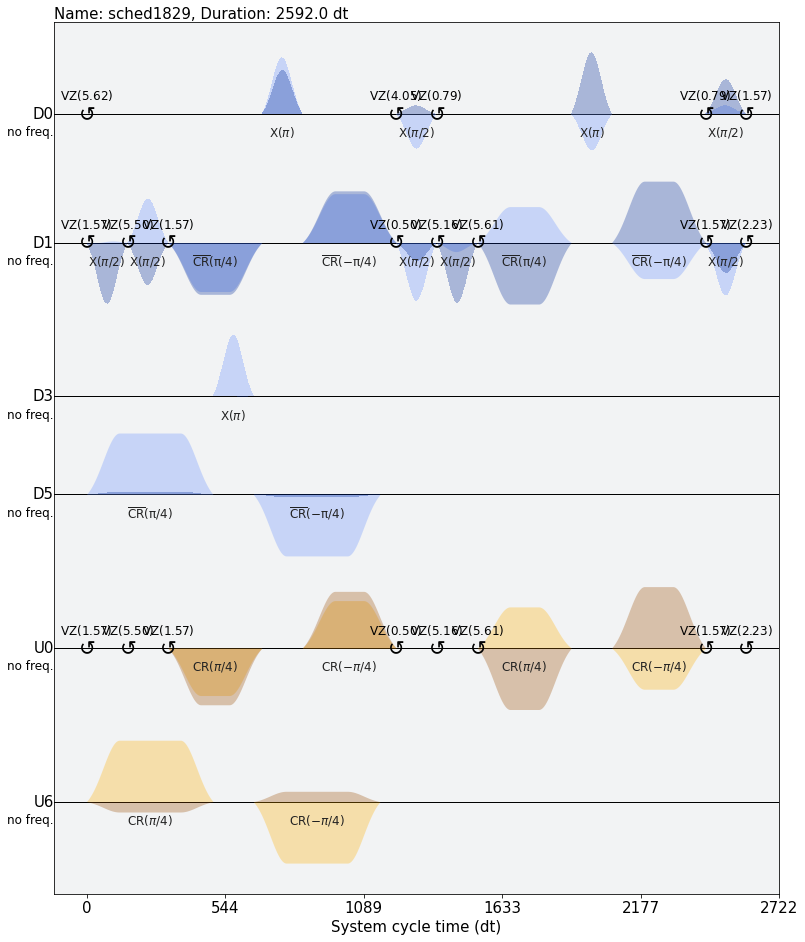

In [18]:
compiler_output.pulse_sequence.draw()